<a href="https://colab.research.google.com/github/MMR1318/Maheshreddy_INFO5731_Fall2024/blob/main/Group5_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACM Pre processing

In [1]:
import pandas as pd
import re

# Load the scraped data
data = pd.read_excel('acm_library_abstract_results.xlsx')

data.head()

,title,published_year,url,authors,page_num,published_month,abstract
0,Promoting Ethical Use of Generative AI in Educ...,2024,https://dl-acm-org.libproxy.library.unt.edu/do...,"['Xuefei (Nancy) Deng', 'K.D. Joshi']",NaN,July,Abstract\nGenerative artificial intelligence (...
1,The Roles and Functions of Foreign Language Te...,2024,https://dl-acm-org.libproxy.library.unt.edu/do...,"['Yushuang Zhang', 'Miao Miao']",NaN,October,Abstract\nWith the rapid development of Genera...
2,Research on Innovative Applications and Impact...,2024,https://dl-acm-org.libproxy.library.unt.edu/do...,"['Chia-Ling Ho', 'Xin-Ying Liu', 'Yu-Wei Qiu']",NaN,July,Abstract\nGenerative Artificial Intelligence (...
3,L@S '24: Proceedings of the Eleventh ACM Confe...,2024,https://dl-acm-org.libproxy.library.unt.edu/do...,"['David Joyner', 'Min Kyu Kim']",NaN,July,NaN
4,Understanding the Adoption of ChatGPT in Highe...,2024,https://dl-acm-org.libproxy.library.unt.edu/do...,"['Ann-Kathrin Kubullek', 'Nadire Kumaç', 'Ayse...",NaN,September,"Abstract\nSince ChatGPT’s introduction, genera..."


In [2]:
data.shape

(2147, 7)

In [3]:
df=data.drop(['page_num','published_month'], axis=1)

In [4]:
# Handling missing values: Dropping rows with missing titles or abstracts
df = df.dropna(subset=['title', 'abstract'])

In [5]:
# Removing duplicates
df = df.drop_duplicates()

In [6]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

In [7]:
df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)

In [8]:
df.shape

(1620, 5)

In [9]:
# Save cleaned data
df.to_excel('cleaned_acm.xlsx', index=False)

Science Direct pre processing

In [10]:
data = pd.read_excel('science_direct_results.xlsx')

data.head()

,title,url,doi,authors,published_date,abstract,page_num
0,Will generative AI replace teachers in higher ...,https://www-sciencedirect-com.libproxy.library...,10.1016/j.stueduc.2024.101395,"['Cecilia Ka Yuk Chan', 'Louisa H. Y. Tsi']",December 2024,This paper evaluates the potential of generati...,1
1,Navigating challenges and opportunities: Nursi...,https://www-sciencedirect-com.libproxy.library...,10.1016/j.nepr.2024.104062,"['Anthony Summers', 'May El Haddad', 'Florin O...",August 2024,This paper evaluates the potential of generati...,1
2,Integrating generative AI in management educat...,https://www-sciencedirect-com.libproxy.library...,10.1016/j.ijme.2024.101017,"['Pragya Gupta', 'Renuka Mahajan', 'Pooja. S. ...",November 2024,This paper evaluates the potential of generati...,1
3,Exploring the integration of IoT and Generativ...,https://www-sciencedirect-com.libproxy.library...,10.1016/j.jocs.2024.102397,"['Wanjin Dong', 'Daohua Pan', 'Soonbae Kim']",October 2024,This paper evaluates the potential of generati...,1
4,Why students use or not use generative AI: Stu...,https://www-sciencedirect-com.libproxy.library...,10.1016/j.dte.2024.100019,['Yun Dai'],Available online 5 November 2024,This paper evaluates the potential of generati...,1


In [11]:
data.shape

(2038, 7)

In [12]:
df=data.drop(['page_num','doi'], axis=1)

In [13]:
# Handling missing values: Dropping rows with missing titles or abstracts
df = df.dropna(subset=['title', 'abstract'])

In [14]:
# Removing duplicates
df = df.drop_duplicates()

In [15]:
# Function to extract year from the 'published_date' column
def extract_year(date_str):
    match = re.search(r'\b(20\d{2})\b', str(date_str))  # Look for years in the format 20XX
    return int(match.group(1)) if match else None

df['year'] = df['published_date'].apply(extract_year)

df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

In [16]:
df=df.drop(['published_date'], axis=1)

In [17]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

In [18]:
df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)

In [19]:
df.shape

(2038, 5)

In [20]:
# Save cleaned data
df.to_excel('cleaned_Science_direct.xlsx', index=False)

Scopus Pre processing

In [21]:
# Load the scraped data
data = pd.read_excel('scopus_results.xlsx')

data.head()

,title,url,authors,journal,publication_details,published_year,abstract,page_num
0,Analyzing Flipped Classroom Themes Trends in C...,https://www-scopus-com.libproxy.library.unt.ed...,"['Keong, T.C.', 'Jimei, G.']",NaN,"46(1), pp. 15–27",2025,Flipped classroom (FC) overcomes many drawback...,1
1,LAMB: An open-source software framework to cre...,https://www-scopus-com.libproxy.library.unt.ed...,"['Alier, M.', 'Pereira, J.', 'García-Peñalvo, ...",NaN,"92, 103940",2025,This paper presents LAMB (Learning Assistant M...,1
2,Enhancing digital literacy in foreign language...,https://www-scopus-com.libproxy.library.unt.ed...,"['Jiang, B.']",NaN,"154, 104845",2025,For foreign language teachers to successfully ...,1
3,Reducing interpretative ambiguity in an educat...,https://www-scopus-com.libproxy.library.unt.ed...,"['Garcia-Varela, F.', 'Bekerman, Z.', 'Nussbau...",NaN,"225, 105182",2025,The study posits that both concrete and abstra...,1
4,Development and techniques in learner model in...,https://www-scopus-com.libproxy.library.unt.ed...,"['Wang, X.', 'Yukiko, M.', 'Chang, H.-H.']",NaN,"225, 105184",2025,"Adaptive e-learning systems (AeLS), which emer...",1


In [22]:
data.shape

(20452, 8)

In [23]:
df=data.drop(['page_num','publication_details','journal'], axis=1)

In [24]:
# Handling missing values: Dropping rows with missing titles or abstracts
df = df.dropna(subset=['title', 'abstract'])

In [25]:
# Removing duplicates
df = df.drop_duplicates()

In [26]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

In [27]:
df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)

In [29]:
df.shape

(1901, 5)

In [28]:
# Save cleaned data
df.to_excel('cleaned_Scopus.xlsx', index=False)


IEEE preprocessing

In [30]:
import pandas as pd
# Load the scraped data
data = pd.read_excel('output_data.xlsx')

data.head()

,title,published_year,url,authors,page_num,abstract,doi,publisher,published_date,conference_date,Unnamed: 10
0,Application Research of Generative Artificial ...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Jing Ning', 'Yi Gao', 'Mingxin Luo', '', '',...",NaN,Abstract:\nThe education mode of art design ed...,DOI: 10.1109/IECA62822.2024.00038,Publisher: IEEE,12 August 2024,26-28 January 2024,NaN
1,A Comprehensive Review on Generative AI for Ed...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Uday Mittal', 'Siva Sai', 'Vinay Chamola', '...",NaN,Abstract:\nArtificial Intelligence (AI) has im...,DOI: 10.1109/ACCESS.2024.3468368,Publisher: IEEE,NaN,NaN,NaN
2,Application of Generative Artificial Intellige...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Ying Li', 'Wei Ji', 'Jiaqi Liu', 'Wenqing Li...",NaN,Abstract:\nIn today's rapidly evolving educati...,DOI: 10.1109/IIST62526.2024.00099,Publisher: IEEE,04 November 2024,04-05 March 2024,NaN
3,The Generative AI Landscape in Education: Mapp...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Zishan Ahmed', 'Shakib Sadat Shanto', 'Most....",NaN,Abstract:\nGenerative AI (GAI) technologies li...,DOI: 10.1109/ACCESS.2024.3461874,Publisher: IEEE,NaN,NaN,NaN
4,Generative AI in Higher Art Education,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Xi Chen', 'Yuebin Liao', 'Wei Yu', '', '', '']",NaN,Abstract:\nThis research delves into the persp...,DOI: 10.1109/CSTE62025.2024.00032,Publisher: IEEE,18 July 2024,19-21 April 2024,NaN


In [31]:
data.shape

(11306, 11)

In [32]:
df=data.drop(['page_num','published_date','doi','publisher','published_date','conference_date','Unnamed: 10'], axis=1)

In [33]:
print(df.columns)

Index(['title ', 'published_year', 'url', 'authors', 'abstract'], dtype='object')


In [34]:
# Handling missing values: Dropping rows with missing titles or abstracts
df = df.dropna(subset=['title ', 'abstract'])

In [35]:
# Removing duplicates
df = df.drop_duplicates()

In [36]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

In [37]:
import re
df['title '] = df['title '].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)

In [38]:
df.shape

(8577, 5)

In [39]:
# Save cleaned data
df.to_excel('cleaned_IEEE.xlsx', index=False)


Merging

In [40]:
ieee = pd.read_excel('cleaned_IEEE.xlsx')

sd = pd.read_excel('cleaned_Science_direct.xlsx')

s = pd.read_excel('cleaned_Scopus.xlsx')

acm = pd.read_excel('cleaned_acm.xlsx')


In [41]:
ieee = ieee.rename(columns={'title ': 'title'})

In [42]:
ieee.columns

Index(['title', 'published_year', 'url', 'authors', 'abstract'], dtype='object')

In [43]:
sd.columns

Index(['title', 'url', 'authors', 'abstract', 'year'], dtype='object')

In [44]:
sd = sd.rename(columns={'year': 'published_year'})

In [45]:
sd.columns

Index(['title', 'url', 'authors', 'abstract', 'published_year'], dtype='object')

In [46]:
s.columns

Index(['title', 'url', 'authors', 'published_year', 'abstract'], dtype='object')

In [47]:
acm.columns

Index(['title', 'published_year', 'url', 'authors', 'abstract'], dtype='object')

In [48]:
ieee = ieee[ieee.columns]
sd = sd[ieee.columns]
s = s[ieee.columns]
acm = acm[ieee.columns]

In [49]:
merged_df = pd.concat([ieee, sd, s, acm], ignore_index=True)

# Save the merged DataFrame
merged_df.to_excel('merged_file.xlsx', index=False)

In [50]:
merged_df.shape

(14136, 5)

In [51]:
# Removing duplicates
data = merged_df.drop_duplicates()

In [52]:
data.shape

(14135, 5)

"EDA"

In [59]:
import pandas as pd
import re
data = pd.read_excel('/content/merged_file.xlsx')

data.head()

,title,published_year,url,authors,abstract
0,application research of generative artificial ...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Jing Ning', 'Yi Gao', 'Mingxin Luo', '', '',...",abstract the education mode of art design educ...
1,a comprehensive review on generative ai for ed...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Uday Mittal', 'Siva Sai', 'Vinay Chamola', '...",abstract artificial intelligence ai has immens...
2,application of generative artificial intellige...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Ying Li', 'Wei Ji', 'Jiaqi Liu', 'Wenqing Li...",abstract in todays rapidly evolving education ...
3,the generative ai landscape in education mappi...,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Zishan Ahmed', 'Shakib Sadat Shanto', 'Most....",abstract generative ai gai technologies like c...
4,generative ai in higher art education,2024,https://ieeexplore-ieee-org.libproxy.library.u...,"['Xi Chen', 'Yuebin Liao', 'Wei Yu', '', '', '']",abstract this research delves into the perspec...


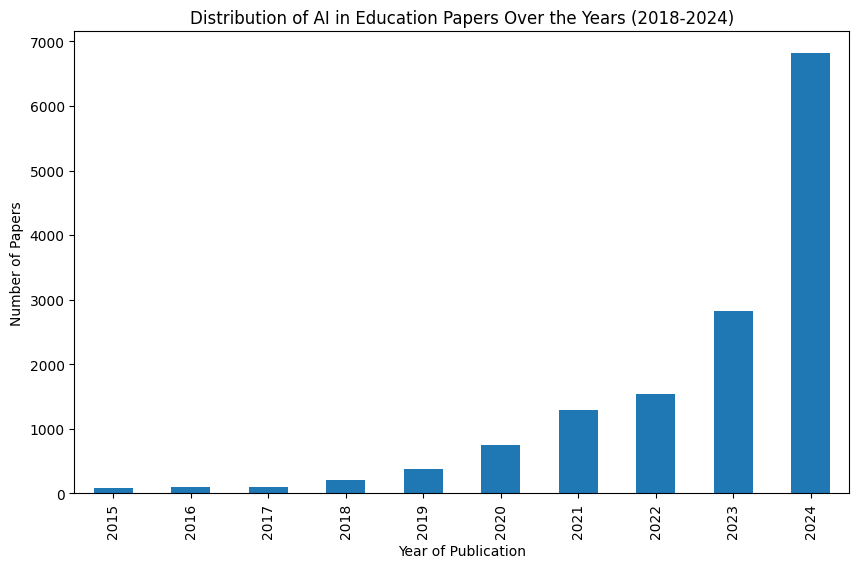

In [62]:
import pandas as pd
import re
import matplotlib.pyplot as plt # Importing the necessary library

data = pd.read_excel('/content/merged_file.xlsx')

data.head()

filtered_data = data[data['published_year'].between(2015, 2024)]

# Count the occurrences of each year and sort by year
year_counts = filtered_data['published_year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6)) # Now 'plt' is defined and can be used
year_counts.plot(kind='bar')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Papers')
plt.title('Distribution of AI in Education Papers Over the Years (2018-2024)')
plt.show()

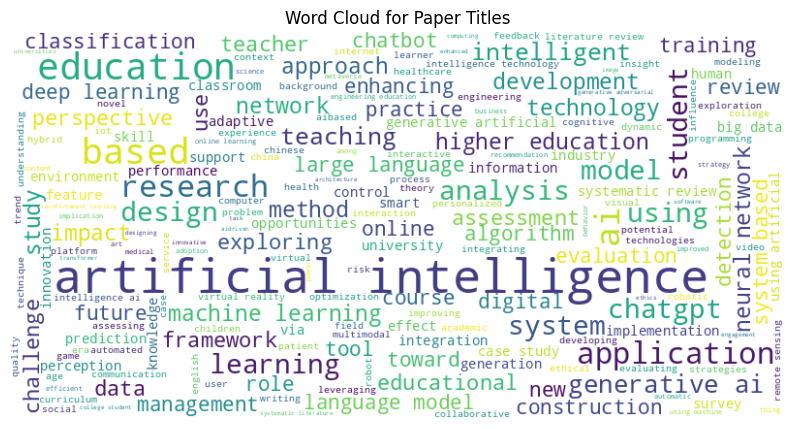

In [66]:
# Word Cloud for Titles

!pip install wordcloud
from wordcloud import WordCloud

title_text = ' '.join(data['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Paper Titles')
plt.show()

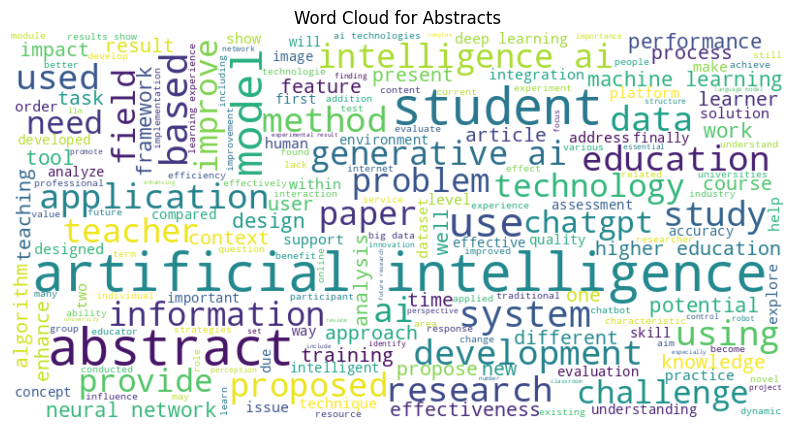

In [67]:
# Word Cloud for Abstracts
abstract_text = ' '.join(data['abstract'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstract_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts')
plt.show()

In [68]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)




data['processed_abstract'] = data['abstract'].apply(preprocess_text)

# Save preprocessed data
data.to_excel('preprocessed.xlsx', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from openai import OpenAI
import pandas as pd
import os

client = OpenAI(
api_key = "LA-70d99a623e53442fa838ea54ba2118eb207c85ecda8b44488c78c32601426258",
base_url = "https://api.llama-api.com"
)

def check_abs(comment):


    response = client.chat.completions.create(
    model="llama3.1-70b",
    messages=[
        {
            "role": "system",
            "content": "You are an experienced paper reviewer, and now you need to screen a batch of papers. Each time you will be given an abstract of a paper, you need to read it carefully, and finally you need to output a number: the number indicates whether this paper is related to 'Generative AI' (0 means irrelevant, 1 means relevant), Your response format should be 'number 1'."
        },
        {
            "role": "user",
            "content": comment
        }
    ],


    )
    return response.choices[0].message.content

columns = ['title', 'published_year', 'url', 'authors','processed_abstract', 'relevant_to_GAI']

def create_or_load_excel(file_path, columns):
    if os.path.exists(file_path):
        df = pd.read_excel(file_path)
    else:
        df = pd.DataFrame(columns=columns)
        df.to_excel(file_path, index=False)
    return df

def append_data_to_excel(file_path, data_list):
    df = create_or_load_excel(file_path, columns)
    new_data_df = pd.DataFrame(data_list)
    df = pd.concat([df, new_data_df], ignore_index=True)
    df.to_excel(file_path, index=False)

def process_excel(input_file, output_file, batch_size=50, start_row=0):
    # Read the input Excel file
    df = pd.read_excel(input_file)

    # Check if 'abstract' column exists
    if 'processed_abstract' not in df.columns:
        raise ValueError("The input Excel file does not contain an 'abstract' column.")

    # Validate start_row
    if start_row < 0 or start_row >= len(df):
        raise ValueError(f"Invalid start_row {start_row}. It should be between 0 and {len(df) - 1}.")

    # Loop through the rows in batches, starting from the specified start_row
    c=1
    for current_row in range(start_row, len(df), batch_size):
        # Slice the next batch
        end_row = min(current_row + batch_size, len(df))
        batch = df.iloc[current_row:end_row].copy()

        # Manually process each row and check relevance of the abstract
        for index, row in batch.iterrows():
            # Get the abstract from the current row
            abstract = row['processed_abstract']

            # Check if the abstract is relevant to GAI
            relevant_to_GAI = check_abs(abstract)

            # Add the result to the batch
            batch.at[index, 'relevant_to_GAI'] = relevant_to_GAI

        batch_list_of_dicts = batch.to_dict(orient='records')
        append_data_to_excel(output_file, batch_list_of_dicts)

        print(f"Batch {c} extracted successfully ")
        c+=1

    print(f"Processing complete. Output saved to {output_file}.")


process_excel('preprocessed.xlsx', 'merged_classified_file.xlsx', batch_size=100, start_row=0)


Batch 1 extracted successfully 
Batch 2 extracted successfully 


In [ ]:
import pandas as pd

# Loading two files
file1 = "merged_classified (5).xlsx"
file2 = "merged_classified (6).xlsx"

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# Combine the DataFrames
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel("merged_classified_file.xlsx", index=False)

print("Files merged successfully into 'merged_file.xlsx'")


Files merged successfully into 'merged_file.xlsx'


In [ ]:
from openai import OpenAI
import pandas as pd
import os

client = OpenAI(
api_key = "LA-70d99a623e53442fa838ea54ba2118eb207c85ecda8b44488c78c32601426258",
base_url = "https://api.llama-api.com"
)

def check_abs(comment):


    response = client.chat.completions.create(
    model="llama3.1-70b",
    messages=[
        {
            "role": "system",
            "content": "You are an experienced paper reviewer, and now you need to screen a batch of papers. Each time you will be given an abstract of a paper, you need to read it carefully, and finally you need to output a number: the number indicates whether this paper is related to 'Education' (0 means irrelevant, 1 means relevant), Your response format should be 'number 1'."
        },
        {
            "role": "user",
            "content": comment
        }
    ],


    )
    return response.choices[0].message.content

columns = ['title', 'published_year', 'url', 'authors','processed_abstract', 'relevant_to_GAI','relevant_to_EDU']

def create_or_load_excel(file_path, columns):
    if os.path.exists(file_path):
        df = pd.read_excel(file_path)
    else:
        df = pd.DataFrame(columns=columns)
        df.to_excel(file_path, index=False)
    return df

def append_data_to_excel(file_path, data_list):
    df = create_or_load_excel(file_path, columns)
    new_data_df = pd.DataFrame(data_list)
    df = pd.concat([df, new_data_df], ignore_index=True)
    df.to_excel(file_path, index=False)

def process_excel(input_file, output_file, batch_size=50, start_row=0):
    # Read the input Excel file
    df = pd.read_excel(input_file)

    # Check if 'abstract' column exists
    if 'processed_abstract' not in df.columns:
        raise ValueError("The input Excel file does not contain an 'abstract' column.")

    # Validate start_row
    if start_row < 0 or start_row >= len(df):
        raise ValueError(f"Invalid start_row {start_row}. It should be between 0 and {len(df) - 1}.")

    # Loop through the rows in batches, starting from the specified start_row
    c=1
    for current_row in range(start_row, len(df), batch_size):
        # Slice the next batch
        end_row = min(current_row + batch_size, len(df))
        batch = df.iloc[current_row:end_row].copy()  # Copy to avoid modifying the original DataFrame

        # Manually process each row and check relevance of the abstract
        for index, row in batch.iterrows():
            # Get the abstract from the current row
            abstract = row['processed_abstract']

            # Check if the abstract is relevant to EDU
            relevant_to_EDU = check_abs(abstract)

            # Add the result to the batch
            batch.at[index, 'relevant_to_EDU'] = relevant_to_EDU

        batch_list_of_dicts = batch.to_dict(orient='records')
        append_data_to_excel(output_file, batch_list_of_dicts)

        print(f"Batch {c} extracted successfully ")
        c+=1

    print(f"Processing complete. Output saved to {output_file}.")


process_excel('merged_classified_file.xlsx', 'merged_classified.xlsx', batch_size=100, start_row=0)


Batch 1 extracted successfully 
Batch 2 extracted successfully 
Batch 3 extracted successfully 
Batch 4 extracted successfully 
Batch 5 extracted successfully 
Batch 6 extracted successfully 
Batch 7 extracted successfully 
Batch 8 extracted successfully 
Batch 9 extracted successfully 
Batch 10 extracted successfully 
Batch 11 extracted successfully 
Batch 12 extracted successfully 
Batch 13 extracted successfully 
Batch 14 extracted successfully 
Batch 15 extracted successfully 
Batch 16 extracted successfully 
Batch 17 extracted successfully 
Batch 18 extracted successfully 
Batch 19 extracted successfully 
Batch 20 extracted successfully 
Batch 21 extracted successfully 
Batch 22 extracted successfully 
Batch 23 extracted successfully 
Batch 24 extracted successfully 
Batch 25 extracted successfully 
Batch 26 extracted successfully 
Batch 27 extracted successfully 
Batch 28 extracted successfully 
Batch 29 extracted successfully 
Batch 30 extracted successfully 
Batch 31 extracted 

In [75]:
df=pd.read_excel('merged_classified.xlsx')
df.dtypes

,0
title,object
published_year,int64
url,object
authors,object
processed_abstract,object
relevant_to_GAI,object
relevant_to_EDU,object
abstract,object


In [76]:
print("Initial dataset shape:", df.shape)

# Clean the 'relevant_to_GAI' and 'relevant_to_EDU' columns
def is_valid_classification(value):
    """
    Checks if the value is a valid classification (0 or 1).
    """
    try:
        int_value = int(value)
        return int_value in [0, 1]
    except (ValueError, TypeError):
        return False

# Apply the validation function to both columns and filter the dataframe
df_cleaned = df[df['relevant_to_GAI'].apply(is_valid_classification) & df['relevant_to_EDU'].apply(is_valid_classification)]

# Convert the columns to integer type for consistency
df_cleaned['relevant_to_GAI'] = df_cleaned['relevant_to_GAI'].astype(int)
df_cleaned['relevant_to_EDU'] = df_cleaned['relevant_to_EDU'].astype(int)

# Display final dataset information
print("Cleaned dataset shape:", df_cleaned.shape)

# Save the cleaned dataset
cleaned_file_path = "cleaned_dataset.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Initial dataset shape: (6400, 8)
Cleaned dataset shape: (5761, 8)


<ipython-input-76-19b6a46192df>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['relevant_to_GAI'] = df_cleaned['relevant_to_GAI'].astype(int)
<ipython-input-76-19b6a46192df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['relevant_to_EDU'] = df_cleaned['relevant_to_EDU'].astype(int)


Cleaned dataset saved to cleaned_dataset.xlsx


In [77]:
import pandas as pd

df_cleaned=pd.read_excel('cleaned_dataset.xlsx')


# Drop rows where both 'relevant_to_GAI' and 'relevant_to_EDU' are 0
df_cleaned = df_cleaned[(df_cleaned['relevant_to_GAI'] != 0) | (df_cleaned['relevant_to_EDU'] != 0)]

# Create a new column 'both_relevant' that is 1 if both 'relevant_to_GAI' and 'relevant_to_EDU' are 1, otherwise 0
df_cleaned['both_relevant'] = ((df_cleaned['relevant_to_GAI'] == 1) & (df_cleaned['relevant_to_EDU'] == 1)).astype(int)

# Display some of the updated DataFrame to verify the changes
print(df_cleaned.head())

# Optionally, display the shape of the DataFrame to confirm dimensions
print("Updated dataset shape:", df_cleaned.shape)

# Save the updated dataset, overwriting the original file
file_path = "cleaned_dataset.xlsx"  # Change this to your original file path if different
df_cleaned.to_excel(file_path, index=False)
print(f"Dataset updates saved back to {file_path}")


                                               title  published_year  \
0  application research of generative artificial ...            2024   
1  application of generative artificial intellige...            2024   
2              generative ai in higher art education            2024   
3  unveiling generative ai in higher education in...            2024   
4  workshop educational innovation through genera...            2024   

                                                 url  \
0  https://ieeexplore-ieee-org.libproxy.library.u...   
1  https://ieeexplore-ieee-org.libproxy.library.u...   
2  https://ieeexplore-ieee-org.libproxy.library.u...   
3  https://ieeexplore-ieee-org.libproxy.library.u...   
4  https://ieeexplore-ieee-org.libproxy.library.u...   

                                             authors  \
0  ['Jing Ning', 'Yi Gao', 'Mingxin Luo', '', '',...   
1  ['Ying Li', 'Wei Ji', 'Jiaqi Liu', 'Wenqing Li...   
2   ['Xi Chen', 'Yuebin Liao', 'Wei Yu', '', '', '']   
3  ['N

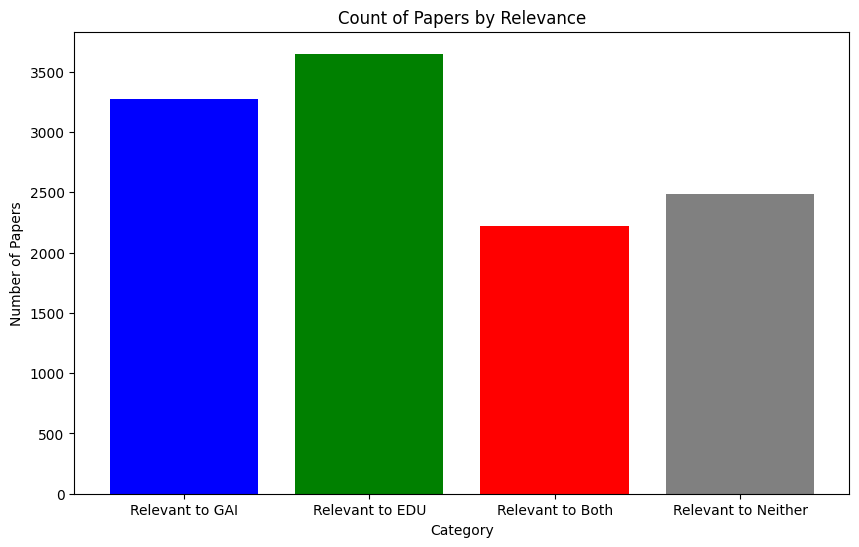

In [78]:
df_cleaned=pd.read_excel('cleaned_dataset.xlsx')

import matplotlib.pyplot as plt

# Calculate counts for each category
count_relevant_GAI = (df_cleaned['relevant_to_GAI'] == 1).sum()
count_relevant_EDU = (df_cleaned['relevant_to_EDU'] == 1).sum()
count_both = (df_cleaned['both_relevant'] == 1).sum()
count_anyone = (df_cleaned['both_relevant'] == 0).sum()

# Categories
categories = ['Relevant to GAI', 'Relevant to EDU', 'Relevant to Both', 'Relevant to Neither']
counts = [count_relevant_GAI, count_relevant_EDU, count_both, count_anyone]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red', 'gray'])
plt.title('Count of Papers by Relevance')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.show()



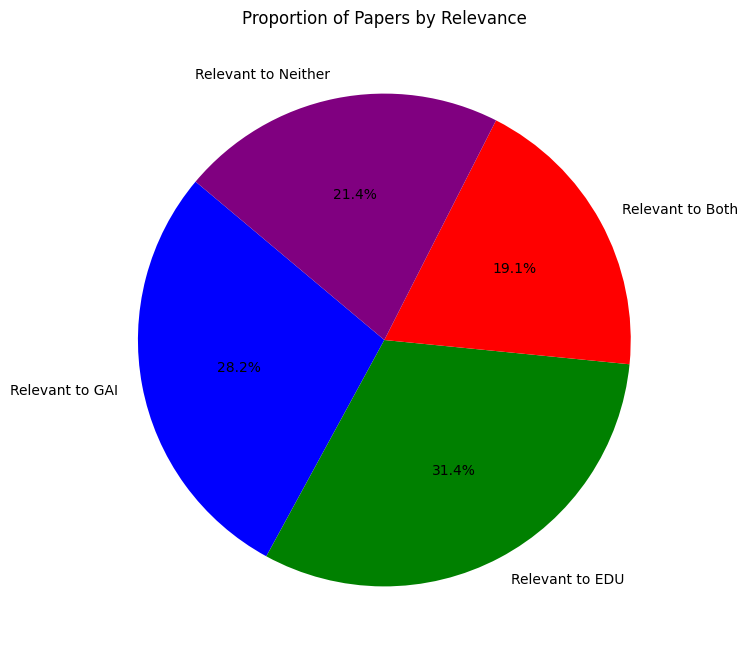

In [79]:
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'purple'])
plt.title('Proportion of Papers by Relevance')
plt.show()


In [80]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

# Create a CountVectorizer for topic modeling
data=pd.read_excel('cleaned_dataset.xlsx')
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(data['processed_abstract'])

In [82]:
# Apply BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(data['processed_abstract'])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [83]:
# Prepare timestamps (published years)
timestamps = data['published_year']  # Ensure 'published_date' is in datetime format


In [84]:
# Calculate topics over time
topics_over_time = topic_model.topics_over_time(data['processed_abstract'], timestamps)


In [85]:
# Visualize topics over time
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)
fig.show()